In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMIF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AMIF\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\AMIF\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\AMIF\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AMIF\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(20491, 2)
(500, 2)


In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# Quick EDA

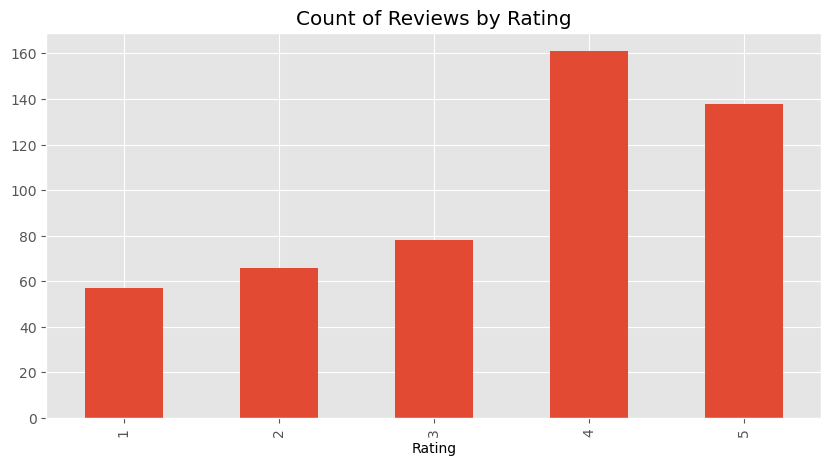

In [4]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind= 'bar',
         title='Count of Reviews by Rating',
         figsize=(10,5))
ax.set_xlabel('Rating')
plt.show()

# Basic NLTK

In [5]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
example = df['Review'][40]
print(example)


bad choice, booked hotel hot wire called immediately requesting nonsmoking room king bed room away elevator/ice.the person spoke pleasant stated not guarantee requests honored make note reservation, check-in person desk rude said no special request noted reservation card andstated no king beds way reservation stuck 2 double beds, located directly accross elevator ice, nonsmoking, no elevator parking garage hotel, warwick mats garage filthy stairwells, hotel faces 4th smells urine, carpets registration elevator area need cleaning, upholstery curtains room needed cleaning andpressing sign bathroom water conservation tub facet dripped continuously, tub drain needsattention shower curtain holes, no coffee maker room, bedding did not fit bed sleeping directly mattress bedding askew, staff unfriendly short, housekeeping staff quite pleasant, stay hotel,  


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['bad',
 'choice',
 ',',
 'booked',
 'hotel',
 'hot',
 'wire',
 'called',
 'immediately',
 'requesting']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('bad', 'JJ'),
 ('choice', 'NN'),
 (',', ','),
 ('booked', 'VBD'),
 ('hotel', 'NN'),
 ('hot', 'JJ'),
 ('wire', 'NN'),
 ('called', 'VBN'),
 ('immediately', 'RB'),
 ('requesting', 'VBG')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  bad/JJ
  choice/NN
  ,/,
  booked/VBD
  hotel/NN
  hot/JJ
  wire/NN
  called/VBN
  immediately/RB
  requesting/VBG
  nonsmoking/VBG
  room/NN
  king/NN
  bed/NN
  room/NN
  away/RB
  elevator/ice.the/JJ
  person/NN
  spoke/VBD
  pleasant/JJ
  stated/VBN
  not/RB
  guarantee/NN
  requests/NNS
  honored/VBD
  make/JJ
  note/NN
  reservation/NN
  ,/,
  check-in/JJ
  person/NN
  desk/NN
  rude/NN
  said/VBD
  no/DT
  special/JJ
  request/NN
  noted/VBD
  reservation/NN
  card/NN
  andstated/VBD
  no/DT
  king/NN
  beds/VBZ
  way/NN
  reservation/NN
  stuck/VBD
  2/CD
  double/JJ
  beds/NNS
  ,/,
  located/VBN
  directly/RB
  accross/IN
  elevator/NN
  ice/NN
  ,/,
  nonsmoking/VBG
  ,/,
  no/DT
  elevator/NN
  parking/VBG
  garage/JJ
  hotel/NN
  ,/,
  warwick/JJ
  mats/NNS
  garage/VBP
  filthy/JJ
  stairwells/NNS
  ,/,
  hotel/NN
  faces/VBZ
  4th/CD
  smells/NNS
  urine/JJ
  ,/,
  carpets/NNS
  registration/VBP
  elevator/JJ
  area/NN
  need/NN
  cleaning/NN
  ,/,
  upholstery/JJ
 

Step 1. VADER Seniment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:


a. Stop words are removed

b. Each word is scored and combined to a total score.

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('You are so bad')

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}

In [12]:
sia.polarity_scores('I AM THE HAPPY PERSON IN THE WORLD')

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

In [13]:
sia.polarity_scores(example)

{'neg': 0.192, 'neu': 0.741, 'pos': 0.067, 'compound': -0.9249}

In [14]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [15]:
res = {}
for i, review in tqdm(enumerate(df['Review']), total=len(df)):
    res[i] = sia.polarity_scores(review)


  0%|          | 0/500 [00:00<?, ?it/s]

In [16]:
# Konversi kamus res ke DataFrame
vaders = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Index'})

# Merge DataFrame vaders dengan DataFrame df berdasarkan index
vaders = vaders.merge(df, left_on='Index', right_index=True, how='left').drop(columns=['Index'])

# Showing rating 1/2
filtered_vaders = vaders[vaders['Rating'].isin([1,2])]
filtered_vaders.head(50)

,neg,neu,pos,compound,Review,Rating
1,0.110,0.701,0.189,0.9787,ok nothing special charge diamond member hilto...,2
10,0.080,0.524,0.395,0.9666,"poor value stayed monaco seattle july, nice ho...",2
15,0.132,0.701,0.167,0.8496,horrible customer service hotel stay february ...,1
16,0.096,0.668,0.236,0.9905,disappointed say anticipating stay hotel monac...,2
24,0.072,0.594,0.334,0.9153,great location need internally upgrade advanta...,2
32,0.093,0.704,0.203,0.8716,"noise airconditioner-a standard, arranged stay...",1
33,0.128,0.654,0.218,0.8874,good location poor cleanliness warwick hotel g...,2
40,0.192,0.741,0.067,-0.9249,"bad choice, booked hotel hot wire called immed...",1
42,0.458,0.463,0.079,-0.9169,warwick bad good reviews warwick shocks staff ...,2
44,0.182,0.650,0.169,-0.1561,"austin powers decor familiar, hotel seattlewhe...",2


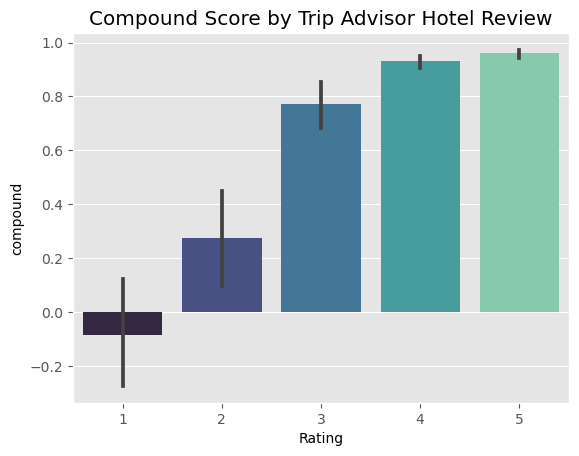

In [17]:
ax = sns.barplot(data=vaders, x='Rating', y='compound', palette='mako')
ax.set_title('Compound Score by Trip Advisor Hotel Review')
plt.show()

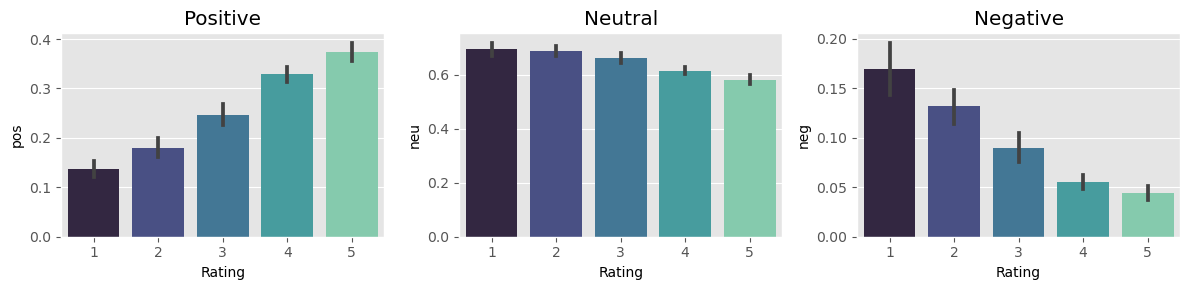

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', palette='mako', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', palette='mako', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', palette='mako', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Step 3. Roberta Pretrained Model

a. Use a model trained of a large corpus of data.

b. Transformer model accounts for the words but also the context related to other words.

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
# VADER results on example
print(example)
sia.polarity_scores(example)

bad choice, booked hotel hot wire called immediately requesting nonsmoking room king bed room away elevator/ice.the person spoke pleasant stated not guarantee requests honored make note reservation, check-in person desk rude said no special request noted reservation card andstated no king beds way reservation stuck 2 double beds, located directly accross elevator ice, nonsmoking, no elevator parking garage hotel, warwick mats garage filthy stairwells, hotel faces 4th smells urine, carpets registration elevator area need cleaning, upholstery curtains room needed cleaning andpressing sign bathroom water conservation tub facet dripped continuously, tub drain needsattention shower curtain holes, no coffee maker room, bedding did not fit bed sleeping directly mattress bedding askew, staff unfriendly short, housekeeping staff quite pleasant, stay hotel,  


{'neg': 0.192, 'neu': 0.741, 'pos': 0.067, 'compound': -0.9249}

In [22]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.6313696, 'roberta_neu': 0.32319546, 'roberta_pos': 0.045434922}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']  # Menggunakan 'review' sebagai kolom teks
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)  # Anda perlu mendefinisikan fungsi polarity_scores_roberta terlebih dahulu
        both = {**vader_result_rename, **roberta_result}
        res[i] = both  # Menggunakan indeks baris sebagai kunci
    except RuntimeError:
        print(f'Broke for index {i}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# Buat DataFrame dari kamus 'res'
results_df = pd.DataFrame(res).T

# Atur ulang indeks dan ubah nama kolom indeks menjadi 'Id'
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Gabungkan dengan DataFrame 'df' menggunakan left join berdasarkan indeks
results_df = results_df.merge(df, how='left', left_on='Id', right_index=True)

In [ ]:
results_df.columns